In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3


In [2]:
def select_by(db, name, type):

    S = """select s1.ts,s1.type,s1.tid,s1.iter,(s2.ts-s1.ts),s1.heap,s2.heap,s1.details
  from stats s1 inner join stats s2 on s1.tid=s2.tid and s1.iter=s2.iter and s1.action!=s2.action and s1.type=s2.type
 where s1.type='{type}' and s1.action='start' and s1.name = '{name}' and s2.name = '{name}'
 order by s1.ts asc;"""
    cur = db.cursor()
    r = []
    #print S.format(type=type, name=name)
    for row in cur.execute(S.format(type=type, name=name)):
        r.append(row)
    return r

def csv(a, N=-1):
    n = 0
    for i in a:
        print ",".join(str(x) for x in i)
        if N > 0:
            if n < N:
                n += 1
            else:
                break

def load_data_set(name):
    db = sqlite3.connect("stats.sql")
    DS = ''
    a = select_by(db, name, 'compute')
    b = select_by(db, name, 'gc')
    #c = a + b
    #c.sort(key=lambda a: a[0])
    #csv(c)
    db.close()
    return a,b


In [65]:
def cdfplot(name, logs=False):
    a, b = load_data_set(name)
    data = [x[4] for x in a]
    num_bins = 20
    counts, bin_edges = np.histogram(data, bins=num_bins, normed=True)
    cdf = np.cumsum(counts)
    #plt.plot(bin_edges[1:], cdf)
    
    sorted_data = np.sort(data)
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    
    if logs: plt.xscale('log')
    plt.plot(sorted_data, yvals,  'r-')
    #plt.plot(sorted_data2,yvals2, 'r-', sorted_data,yvals,'bs' )



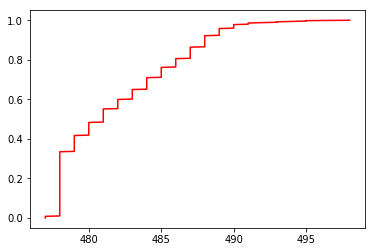

In [57]:
cdfplot("20170925-cloj-gcb-loop")


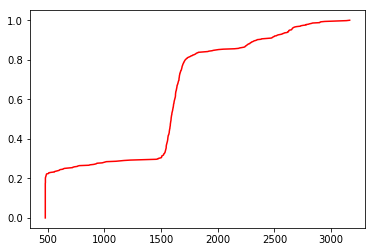

In [58]:
cdfplot("20170919-cloj-p9-loop")


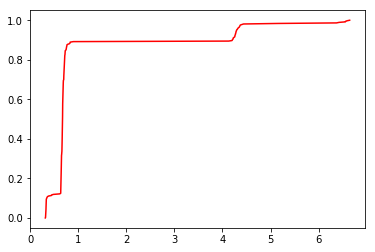

In [59]:
cdfplot("20170927-hask-gcb")


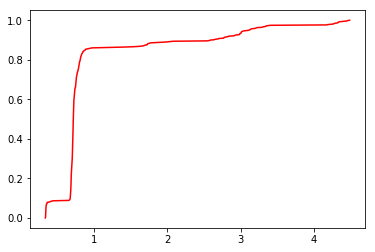

In [60]:
cdfplot("20170927-hask-p9")


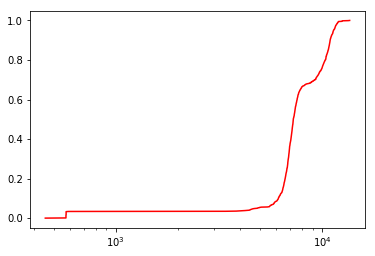

In [66]:
cdfplot("20170919-scala-gcb-loop", logs=True)

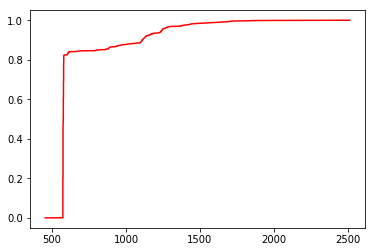

In [62]:
cdfplot("20170919-scala-p9-loop")

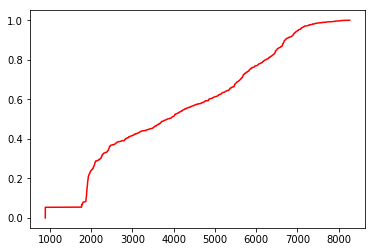

In [63]:
cdfplot("20170830-mlton-gcb")

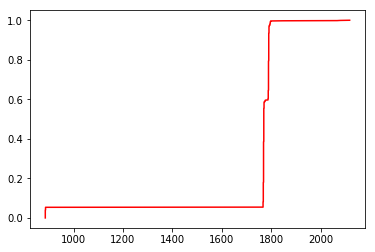

In [64]:
cdfplot("20170831-mlton-p9")